# Tutorial

This tutorial demonstrates basic usage of `httm`.

## Getting Started

### Importing `matplotlib`

To start, we will import `matplotlib` and increase the figure size so we can reasonably see artifacts in various FITS images we are going to be looking at.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 8)

### Viewing a RAW FITS File

Assume you have a file: 
    
    fits_files/raw_fits/SINGLE_CCD.fits

...containing an unmodified FITS full frame image.

To get started, open this file and extract a `httm.data_structures.raw_converter.RAWConverter` object.

This is done by calling `httm.fits_utilities.raw_fits.raw_converter_from_fits`.

In [3]:
from httm.fits_utilities.raw_fits import raw_converter_from_fits

raw_data = raw_converter_from_fits('fits_files/raw_fits/SINGLE_CCD.fits')

In [4]:
from httm.transformations.raw_converters_to_calibrated import convert_adu_to_electrons

In [5]:
reduce(lambda x,f: f(x), [convert_adu_to_electrons], raw_data)

SingleCCDRawConverter(slices=(Slice(index=0, units='electrons', pixels=array([[  36790.40961581,   36801.3871685 ,   36784.92083696, ...,
          36790.40961581,   36790.40961581,   36966.04965559],
       [  36801.3871685 ,   36801.3871685 ,   36790.40961581, ...,
          36779.43205643,   36795.89839299,   36944.09474433],
       [  36806.87594233,   36779.43205643,   36806.87594233, ...,
          36790.40961581,   36801.3871685 ,   36960.56093028],
       ..., 
       [  36795.89839299,   36790.40961581,   36801.3871685 , ...,
          36773.94327423,   36795.89839299,   36982.51582147],
       [  36795.89839299,   36795.89839299,   36817.85348498, ...,
          36806.87594233,   36784.92083696,   36949.58347465],
       [      0.        ,     599.49002908,       0.        , ...,
         102907.35536491,  133625.76981419,   64920.35904544]])), Slice(index=1, units='electrons', pixels=array([[  36971.53837922,   36971.53837922,   36971.53837922, ...,
          36955.07220331,

In [6]:
from httm.transformations.calibrated_converters_to_raw import convert_electrons_to_adu

In [7]:
reduce(lambda x,f: f(x), [convert_adu_to_electrons], raw_data)

SingleCCDRawConverter(slices=(Slice(index=0, units='electrons', pixels=array([[  36790.40961581,   36801.3871685 ,   36784.92083696, ...,
          36790.40961581,   36790.40961581,   36966.04965559],
       [  36801.3871685 ,   36801.3871685 ,   36790.40961581, ...,
          36779.43205643,   36795.89839299,   36944.09474433],
       [  36806.87594233,   36779.43205643,   36806.87594233, ...,
          36790.40961581,   36801.3871685 ,   36960.56093028],
       ..., 
       [  36795.89839299,   36790.40961581,   36801.3871685 , ...,
          36773.94327423,   36795.89839299,   36982.51582147],
       [  36795.89839299,   36795.89839299,   36817.85348498, ...,
          36806.87594233,   36784.92083696,   36949.58347465],
       [      0.        ,     599.49002908,       0.        , ...,
         102907.35536491,  133625.76981419,   64920.35904544]])), Slice(index=1, units='electrons', pixels=array([[  36971.53837922,   36971.53837922,   36971.53837922, ...,
          36955.07220331,

Each raw image contains the data for a single CCD.  It contains 4 slices if it was taken by the instrument, and either 1 or 4 if it was created synthetically.

Below, we visualize the first slice of the image.

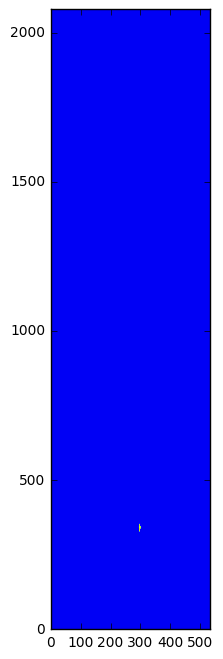

In [8]:
matplotlib.pyplot.imshow(raw_data.slices[0].pixels)
matplotlib.pyplot.gca().invert_yaxis()

### Viewing a Calibrated FITS Image

In [9]:
from httm.fits_utilities.calibrated_fits import calibrated_converter_from_fits

calibrated_data = calibrated_converter_from_fits('fits_files/calibrated_fits/small_simulated_data.fits')

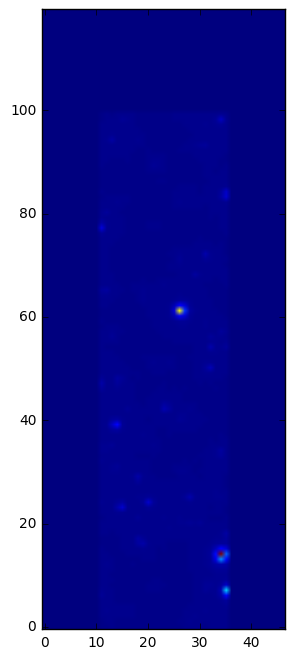

In [10]:
matplotlib.pyplot.imshow(calibrated_data.slices[0].pixels)
matplotlib.pyplot.gca().invert_yaxis()

In [11]:
from httm.transformations.calibrated_converters_to_raw import convert_electrons_to_adu, simulate_undershoot, add_readout_noise, simulate_blooming, add_shot_noise, introduce_smear_rows, add_baseline 

In [12]:
calibrated_data

SingleCCDCalibratedConverter(slices=[Slice(index=0, units='electrons', pixels=array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])), Slice(index=1, units='electrons', pixels=array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])), Slice(index=2, units='electrons', pixels=array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])), 

In [13]:
reduce(lambda x,f: f(x), [introduce_smear_rows, add_shot_noise, simulate_blooming, add_readout_noise, simulate_undershoot, add_baseline, convert_electrons_to_adu], calibrated_data)

SingleCCDCalibratedConverter(slices=(Slice(index=0, units='ADU', pixels=array([[ 199.04110514,  198.04398285,  196.13198051, ...,  198.75119852,
         201.33709111,  199.21418866],
       [ 196.85850142,  198.75772074,  197.48888417, ...,  198.20159414,
         199.34831398,  198.46033201],
       [ 199.72915979,  198.7271442 ,  197.35450083, ...,  196.67211225,
         201.60894925,  198.32192312],
       ..., 
       [ 200.52819292,  197.07823708,  199.40044571, ...,  199.52626138,
         198.67963342,  200.42116307],
       [ 198.98484659,  200.52624209,  198.99299657, ...,  199.17568345,
         198.40244559,  197.37065082],
       [ 200.16992017,  197.21122675,  198.27068713, ...,  200.03649404,
         198.94611156,  196.50192005]])), Slice(index=1, units='ADU', pixels=array([[ 198.85220755,  194.53238387,  199.36569257, ...,  200.86846165,
         196.58941055,  199.01052353],
       [ 197.97614433,  200.35259241,  200.31272   , ...,  201.15311025,
         200.3530727

In [14]:
reduce(lambda x,f: f(x), [introduce_smear_rows, add_shot_noise, simulate_blooming, add_readout_noise, simulate_undershoot, add_baseline, convert_electrons_to_adu], calibrated_data)

SingleCCDCalibratedConverter(slices=(Slice(index=0, units='ADU', pixels=array([[ 201.64228737,  199.26871918,  198.70275682, ...,  195.42824128,
         196.72624338,  197.32260308],
       [ 197.6843187 ,  199.9137901 ,  200.77241556, ...,  201.13623769,
         200.74699895,  196.81375248],
       [ 202.11156089,  196.41110709,  195.84478044, ...,  199.74309143,
         199.8104509 ,  198.37300239],
       ..., 
       [ 199.78513528,  194.89958257,  198.89303332, ...,  199.56134001,
         198.38066551,  198.52487488],
       [ 200.33264199,  201.91761813,  194.80145466, ...,  199.16148439,
         196.52851054,  200.80500724],
       [ 197.42920358,  198.47513004,  199.16944697, ...,  198.68209417,
         199.05773354,  197.39565625]])), Slice(index=1, units='ADU', pixels=array([[ 198.6421818 ,  203.02592706,  195.40611069, ...,  196.58997455,
         200.8007652 ,  198.47170857],
       [ 199.51346123,  197.5775971 ,  197.7196188 , ...,  197.79600017,
         198.6722907